Tom has smartphone data like ram
storage memory and others but he does not know how to name this data or assign classifications to it

In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import PowerTransformer
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,DBSCAN
from sklearn.decomposition import PCA


Importing Libraries

In [3]:
df=pd.read_csv('test.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

seeing info: all of columns are numerical

In [54]:
df.shape

(1000, 22)

In [7]:
df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [5]:
df = df.drop('id', axis=1)

In [16]:
df.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [ ]:
no missing values

In [20]:
def count_outliers_per_column(df):
    count_outlier = {}
    total_outliers = 0

    numeric_cols = df.select_dtypes(include='number').columns

    for column in numeric_cols:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        count = outliers.shape[0]

        count_outlier[column] = count
        total_outliers += count

    return count_outlier, total_outliers

outliers_dict, total = count_outliers_per_column(df)


print("outliers in all columns")
for col, count in outliers_dict.items():
    print(f"{col}: {count}")

print(f"\n total outliers = {total}")

outliers in all columns
battery_power: 0
blue: 0
clock_speed: 0
dual_sim: 0
fc: 14
four_g: 0
int_memory: 0
m_dep: 0
mobile_wt: 0
n_cores: 0
pc: 0
px_height: 2
px_width: 0
ram: 0
sc_h: 0
sc_w: 5
talk_time: 0
three_g: 244
touch_screen: 0
wifi: 0

 total outliers = 265


count outlier by iqr method 

In [9]:
df['three_g'].value_counts(normalize=True)


three_g
1    0.756
0    0.244
Name: proportion, dtype: float64

the outliers in the 3g column are not considered true outliers because the column is binary consisting only of 0s and 1s

In [7]:
cols = ['sc_w', 'px_height', 'fc']
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
mean_vals = df[cols].mean()

def replace_outliers(row):
    for col in cols:
        if (row[col] < lower_bound[col]) or (row[col] > upper_bound[col]):
            row[col] = mean_vals[col]
    return row

df[cols] = df[cols].apply(lambda x: x.mask((x < lower_bound[x.name]) | (x > upper_bound[x.name]), mean_vals[x.name]))


replace outlier by mean value

In [13]:
df.skew()

battery_power    0.038771
blue            -0.064129
clock_speed      0.185938
dual_sim        -0.068142
fc               0.881659
four_g           0.052096
int_memory      -0.071781
m_dep            0.014054
mobile_wt        0.007531
n_cores          0.122570
pc               0.004038
px_height        0.590825
px_width        -0.030880
ram             -0.048189
sc_h            -0.038293
sc_w             0.735980
talk_time        0.015640
three_g         -1.193896
touch_screen     0.000000
wifi            -0.028045
dtype: float64

check skew 

In [9]:
cols = ['fc', 'px_height', 'sc_w']

for col in cols:
    df[col ] = np.log1p(df[col])

transform skew columns by log1p method

In [26]:
df.skew()

battery_power    0.038771
blue            -0.064129
clock_speed      0.185938
dual_sim        -0.068142
fc              -0.224388
four_g           0.052096
int_memory      -0.071781
m_dep            0.014054
mobile_wt        0.007531
n_cores          0.122570
pc               0.004038
px_height       -1.641743
px_width        -0.030880
ram             -0.048189
sc_h            -0.038293
sc_w            -0.539926
talk_time        0.015640
three_g         -1.193896
touch_screen     0.000000
wifi            -0.028045
dtype: float64

checking the data again it turned out that there is a column that was transformed using squared left

In [11]:
cols_to_transform = ['px_height', 'int_memory']
pt = PowerTransformer(method='yeo-johnson')
transformed = pt.fit_transform(df[cols_to_transform])
df[cols_to_transform] = transformed

print('skew after transformation:')
print(df[cols_to_transform].skew())

skew after transformation:
px_height    -0.274034
int_memory   -0.245699
dtype: float64


applied the Yeo-Johnson power transformation to the px_height column to reduce skewness and make its distribution more normal then it updates the column with the transformed values and prints the skewness after transformation

In [13]:
numeric_cols = ['battery_power', 'clock_speed', 'int_memory', 'mobile_wt', 
                'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


scaling columns

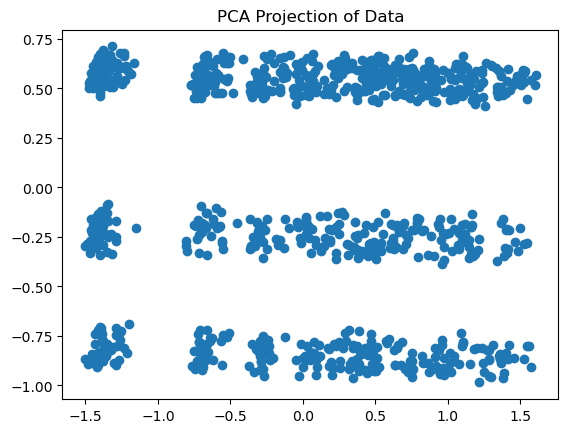

In [88]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)  

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('PCA Projection of Data')
plt.show()


We used the PCA algorithm for dimensionality reduction because there are many features to better visualize the data distribution and decide which clustering algorithm to use from the plot clear and well-separated clusters appear so we will use the K-means algorithm

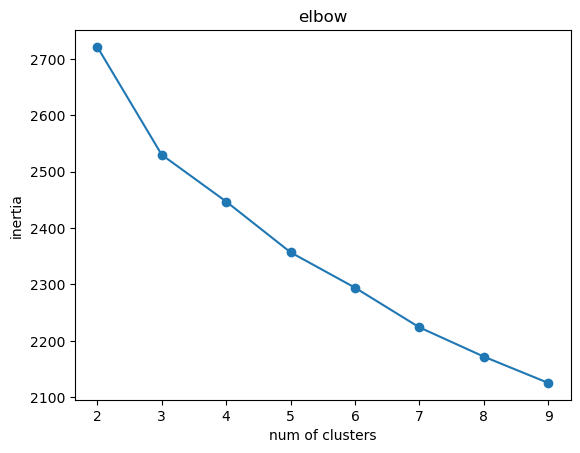

In [40]:
inertia = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)  

plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel('num of clusters')
plt.ylabel('inertia')
plt.title('elbow')
plt.show()


We used the K-means algorithm with k values from 2 to 11 to find the best k for the data then we calculated the inertia and plotted the elbow method which showed that the best k for this data is 2

Number of clusters: 2, Silhouette Score: 0.1687
Number of clusters: 3, Silhouette Score: 0.1198
Number of clusters: 4, Silhouette Score: 0.1077
Number of clusters: 5, Silhouette Score: 0.0860
Number of clusters: 6, Silhouette Score: 0.0795
Number of clusters: 7, Silhouette Score: 0.0773
Number of clusters: 8, Silhouette Score: 0.0726
Number of clusters: 9, Silhouette Score: 0.0758


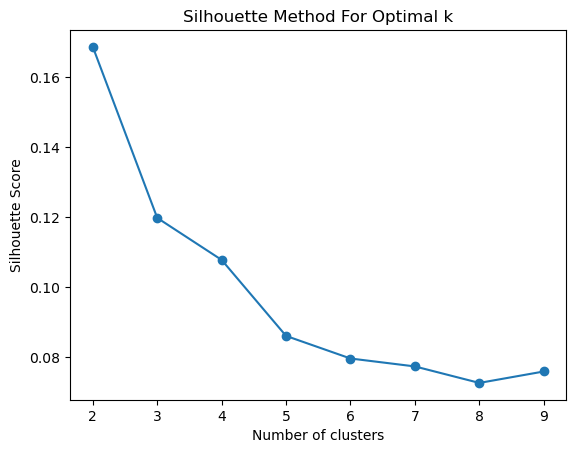

Best number of clusters: 2
cluster
0    574
1    426
Name: count, dtype: int64


In [34]:
  sil_scores = []
cluster_labels_list = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df)
    score = silhouette_score(df, cluster_labels)
    sil_scores.append(score)
    cluster_labels_list.append(cluster_labels)
    print(f'Number of clusters: {n_clusters}, Silhouette Score: {score:.4f}')

plt.plot(range(2, 10), sil_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k')
plt.show()
best_n_clusters = range(2, 10)[sil_scores.index(max(sil_scores))]
print(f"Best number of clusters: {best_n_clusters}")
best_labels = cluster_labels_list[sil_scores.index(max(sil_scores))]
df['cluster'] = best_labels

print(df['cluster'].value_counts())

To confirm further we calculated the silhouette score and plotted it the highest value was also at 2 clusters we then added a new column to the data called cluster containing the K-means results

silhouette score after PCA and KMeans k=2: 0.4591


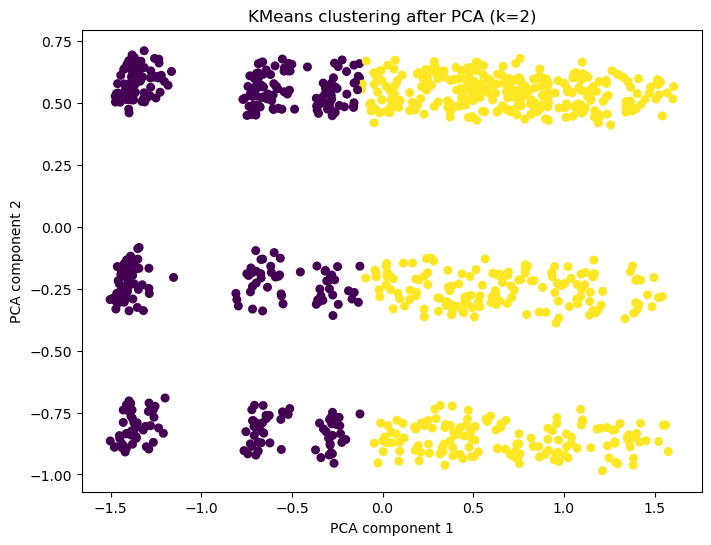

In [30]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_reduced)
score = silhouette_score(X_reduced, labels)
print(f"silhouette score after PCA and KMeans k={k}: {score:.4f}")

plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', s=30)
plt.title(f"KMeans clustering after PCA (k={k})")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.show()


In [17]:
X = df.copy()

eps_values = np.arange(0.5, 5.1, 0.5)
min_samples_values = range(2, 7)

results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X)

        unique_labels = set(labels)
        n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)  
        n_noise = list(labels).count(-1)
        if n_clusters >= 2:
            score = silhouette_score(X, labels)
        else:
            score = np.nan  

        results.append({ 'eps': eps, 'min_samples': min_samples, 'n_clusters': n_clusters, 'n_noise': n_noise, 'silhouette_score': score })

results_df = pd.DataFrame(results).sort_values(by='silhouette_score', ascending=False).reset_index(drop=True)
print(results_df.head(10))

   eps  min_samples  n_clusters  n_noise  silhouette_score
0  1.5            2           2        9          0.052839
1  1.0            5           2      990         -0.096193
2  1.0            4           5      974         -0.187166
3  1.0            3          15      936         -0.242770
4  1.0            2          71      824         -0.271011
5  0.5            2           0     1000               NaN
6  0.5            3           0     1000               NaN
7  0.5            4           0     1000               NaN
8  0.5            5           0     1000               NaN
9  0.5            6           0     1000               NaN


In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_pca)

        unique_labels = set(labels)
        n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
        n_noise = list(labels).count(-1)

        if n_clusters >= 2:
            score = silhouette_score(X_pca, labels)
        else:
            score = np.nan

        results.append({'eps': eps,'min_samples': min_samples,'n_clusters': n_clusters,'n_noise': n_noise,'silhouette_score': score})

results_df_pca = pd.DataFrame(results).sort_values(by='silhouette_score', ascending=False).reset_index(drop=True)
print(results_df_pca.head(10))


   eps  min_samples  n_clusters  n_noise  silhouette_score
0  0.5            2           2        0          0.308514
1  0.5            3           2        0          0.308514
2  0.5            4           2        0          0.308514
3  0.5            5           2        0          0.308514
4  0.5            6           2        0          0.308514
5  1.0            2           1        0               NaN
6  1.0            3           1        0               NaN
7  1.0            4           1        0               NaN
8  1.0            5           1        0               NaN
9  1.0            6           1        0               NaN


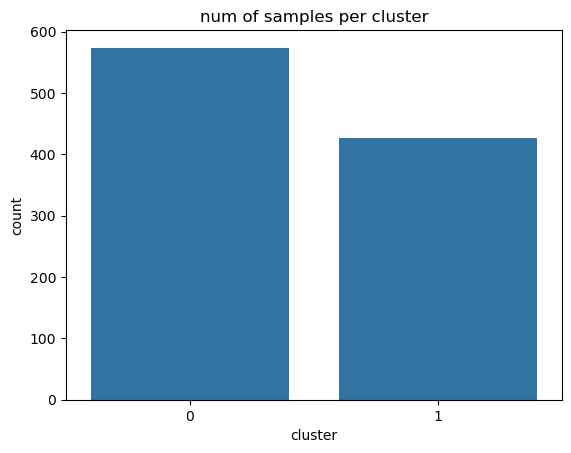

In [38]:
sns.countplot(x='cluster', data=df)
plt.title("num of samples per cluster")
plt.show()


In [ ]:
look a new column distribution

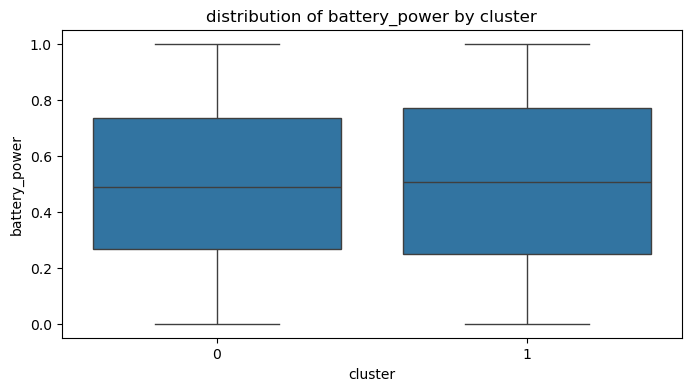

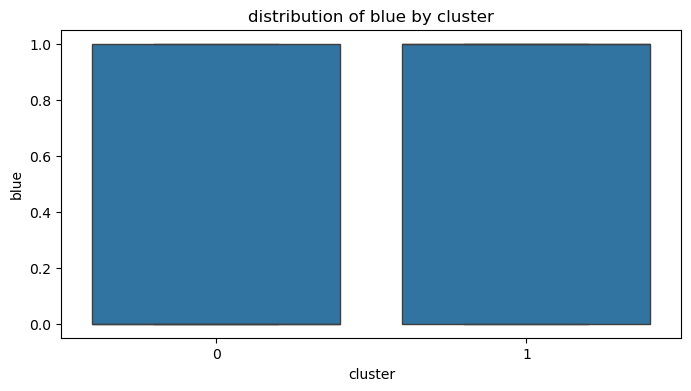

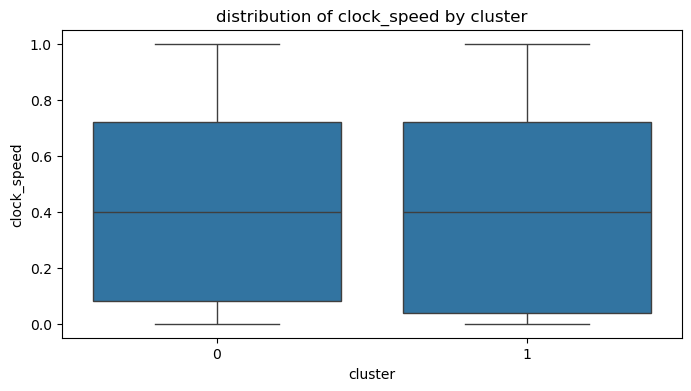

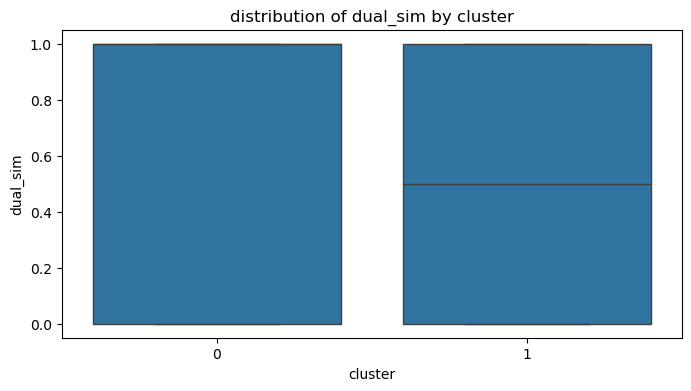

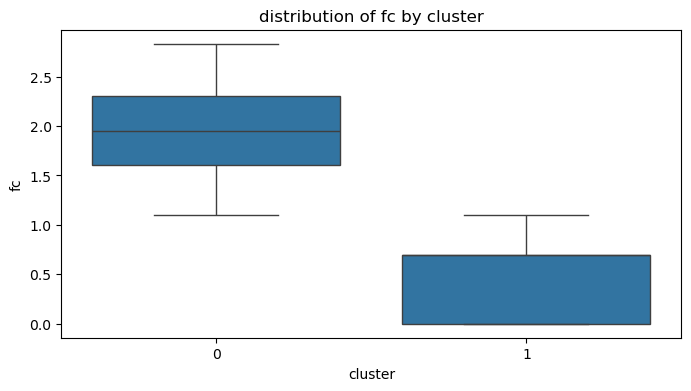

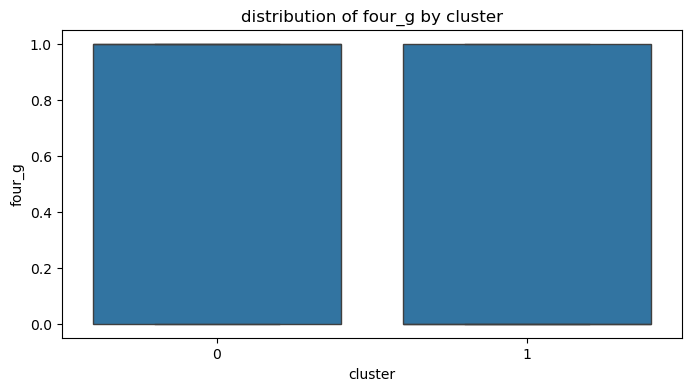

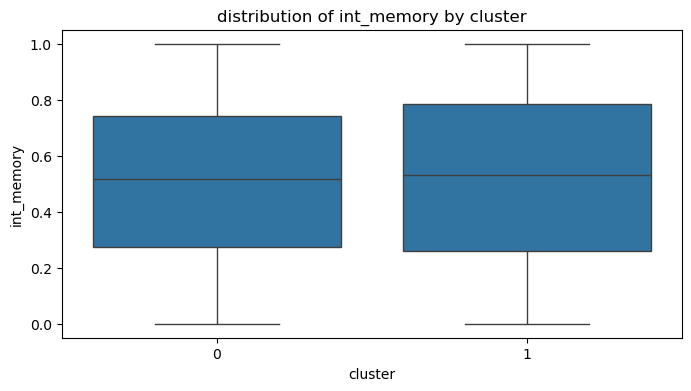

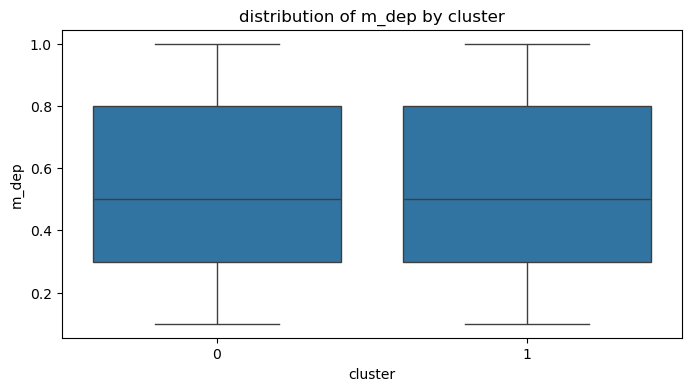

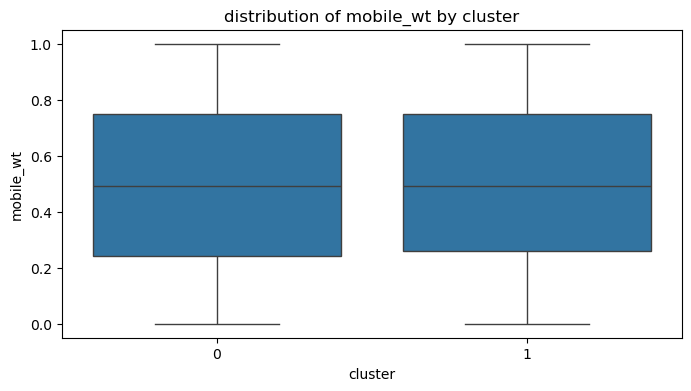

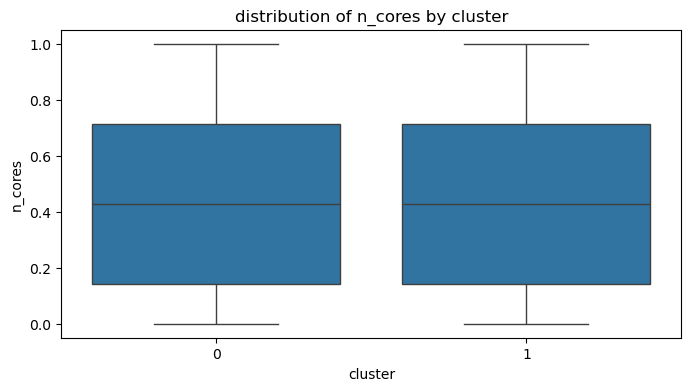

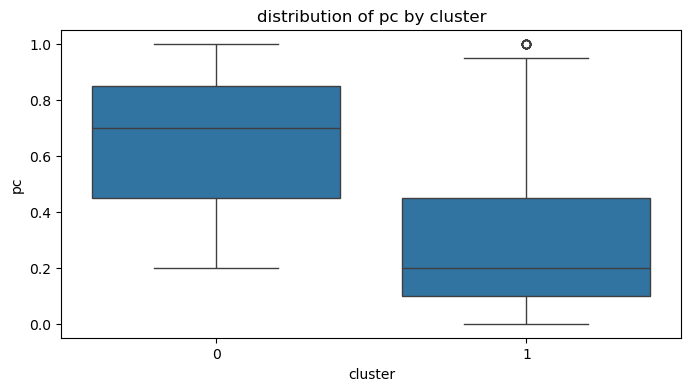

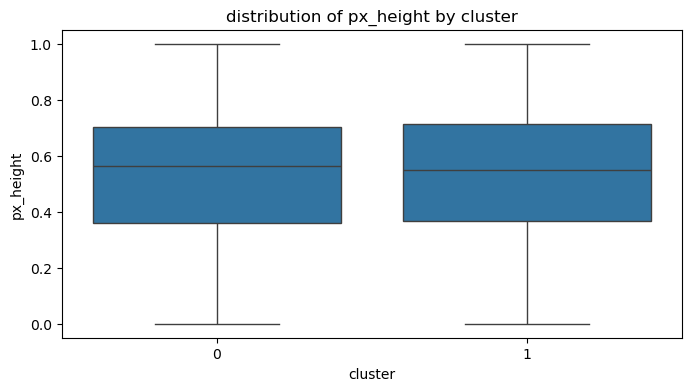

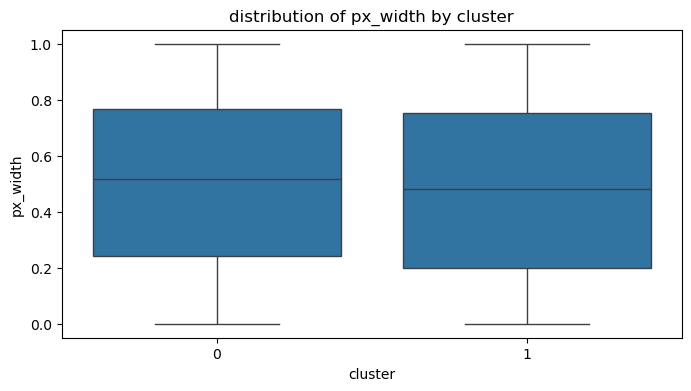

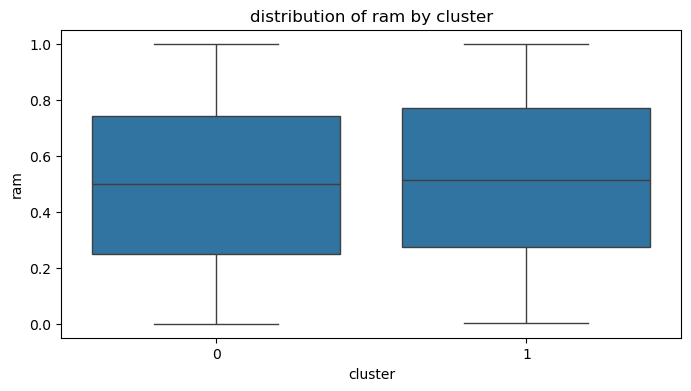

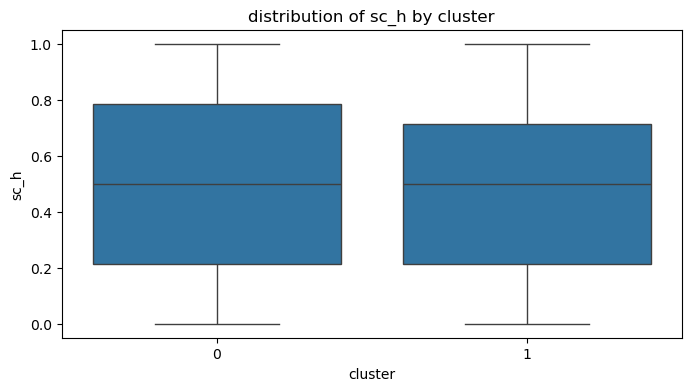

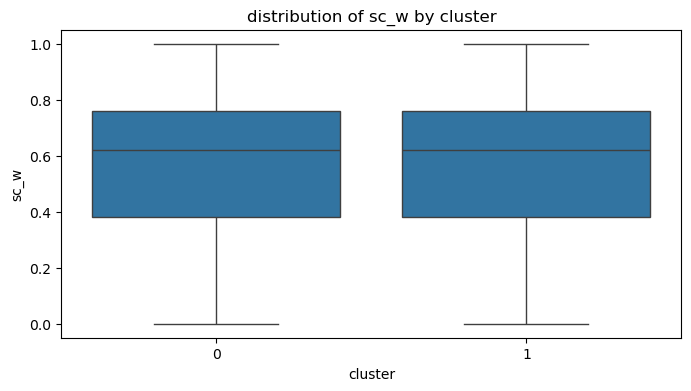

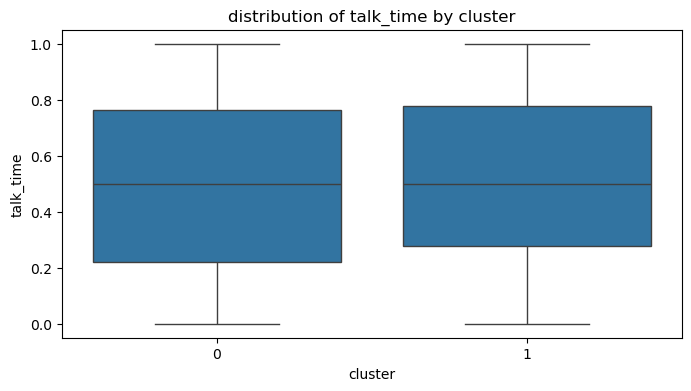

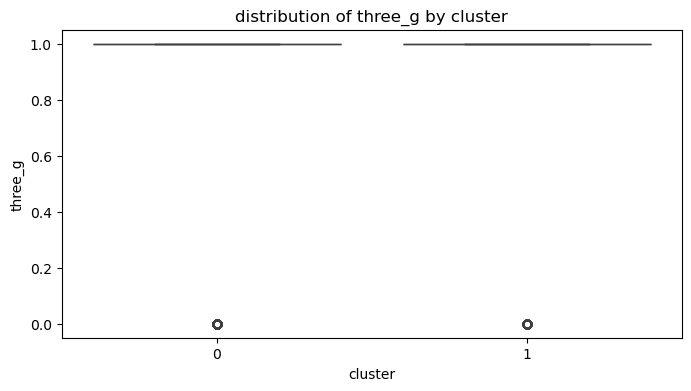

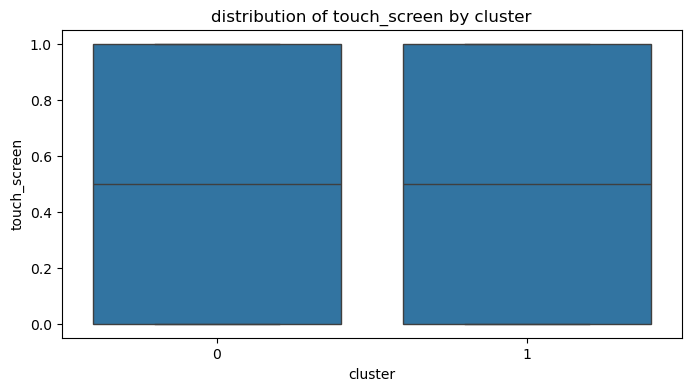

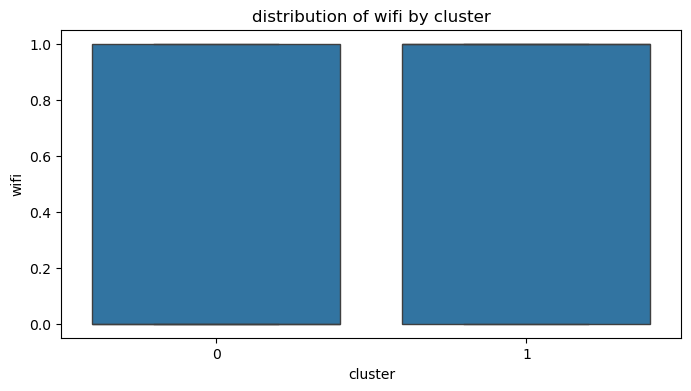

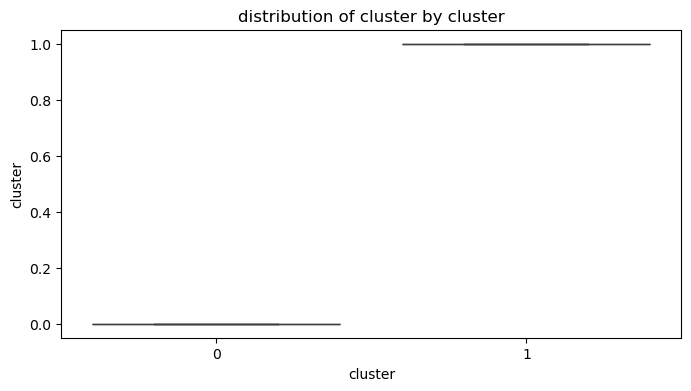

In [44]:
for col in df:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='cluster', y=col, data=df)
    plt.title(f'distribution of {col} by cluster')
    plt.show()

To analyze the results we plotted boxplots to see the distribution of each feature with the new column it became clear that the features fc and pc have a clear separation and greatly influence the clusters

In [46]:
feature_cols = [col for col in df.columns if col not in ['cluster']]

anova_results = []

for col in feature_cols:
    group0 = df[df['cluster'] == 0][col]
    group1 = df[df['cluster'] == 1][col]
    
    f_stat, p_value = f_oneway(group0, group1)
    
    anova_results.append({
        'feature': col,
        'f_stat': f_stat,
        'p_value': p_value
    })


anova_df = pd.DataFrame(anova_results)
anova_df = anova_df.sort_values('p_value')

significant = anova_df[anova_df['p_value'] < 0.05]

print("important feature ")
print(significant)


important feature 
   feature       f_stat        p_value
4       fc  3148.977814  6.024561e-311
10      pc   486.881834   3.430831e-88
19    wifi     4.751536   2.950529e-02


summary :
the code performs anova tests to identify which features significantly differ between the two clusters it compares each feature across cluster 0 and cluster 1 then selects those with a p value less than 005 indicating statistical significance
results:
fc and pc show very high f statistics and extremely low p values meaning they strongly influence the clustering
wifi also shows a statistically significant difference but with a much smaller effect compared to fc and pc

In [52]:
print("feature averages per cluster")
print(cluster_means)
print("generalfeature averages ")
print(overall_means)


feature averages per cluster
               fc        pc      wifi
cluster                              
0        2.007379  0.652962  0.477352
1        0.439020  0.300235  0.546948
generalfeature averages 
fc      1.339258
pc      0.502700
wifi    0.507000
dtype: float64


the means of the selected features in cluster 0 are higher than the overall mean except for wifi which is lower in cluster 0 and higher in cluster 1

In [48]:
features = ['fc', 'pc', 'wifi']
overall_means = df[features].mean()
cluster_means = df.groupby('cluster')[features].mean()
cluster_classification = {}

for cluster_id, row in cluster_means.iterrows():
    high_count = sum(row > overall_means)

    if high_count >= len(features) / 2:
        cluster_classification[cluster_id] = 'High'
    else:
        cluster_classification[cluster_id] = 'Low'
df['cluster_class'] = df['cluster'].map(cluster_classification)

print(df[['cluster', 'cluster_class']].drop_duplicates())


   cluster cluster_class
0        0          High
2        1           Low


we selected the most influential features based on previous analysis then calculated the overall mean for each of them after that we calculated the mean values within each cluster and compared them to the overall means if the cluster mean was higher for most features we assigned the cluster a high label otherwise it was labeled low and we added a new column with the new classification

The final results show that the features pc and fc which are the rear and front camera resolutions are the biggest factors affecting the clusters and now Tom can classify his smartphones